##Importing Lib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Importing all SKlearn Modules

In [5]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##Importing Dataset

In [6]:
dataset=pd.read_csv('diabetes.csv')
dataset.isnull().sum()
x=dataset.iloc[:,: -1].values
y=dataset.iloc[:,-1].values

In [7]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [8]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

## Spliting the dataset into train set and test set

In [9]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.10, random_state=5)

In [10]:
print(x_train)

[[0.00e+00 1.62e+02 7.60e+01 ... 4.96e+01 3.64e-01 2.60e+01]
 [7.00e+00 1.29e+02 6.80e+01 ... 3.85e+01 4.39e-01 4.30e+01]
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 ...
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [6.00e+00 1.25e+02 7.80e+01 ... 2.76e+01 5.65e-01 4.90e+01]
 [8.00e+00 1.96e+02 7.60e+01 ... 3.75e+01 6.05e-01 5.70e+01]]


In [11]:
print(y_train)

[1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 

In [12]:
print(x_test)

[[6.000e+00 9.200e+01 6.200e+01 3.200e+01 1.260e+02 3.200e+01 8.500e-02
  4.600e+01]
 [5.000e+00 1.320e+02 8.000e+01 0.000e+00 0.000e+00 2.680e+01 1.860e-01
  6.900e+01]
 [3.000e+00 1.060e+02 7.200e+01 0.000e+00 0.000e+00 2.580e+01 2.070e-01
  2.700e+01]
 [4.000e+00 9.900e+01 6.800e+01 3.800e+01 0.000e+00 3.280e+01 1.450e-01
  3.300e+01]
 [4.000e+00 9.600e+01 5.600e+01 1.700e+01 4.900e+01 2.080e+01 3.400e-01
  2.600e+01]
 [1.000e+00 9.000e+01 6.200e+01 1.800e+01 5.900e+01 2.510e+01 1.268e+00
  2.500e+01]
 [6.000e+00 1.470e+02 8.000e+01 0.000e+00 0.000e+00 2.950e+01 1.780e-01
  5.000e+01]
 [5.000e+00 1.430e+02 7.800e+01 0.000e+00 0.000e+00 4.500e+01 1.900e-01
  4.700e+01]
 [5.000e+00 1.370e+02 1.080e+02 0.000e+00 0.000e+00 4.880e+01 2.270e-01
  3.700e+01]
 [6.000e+00 1.230e+02 7.200e+01 4.500e+01 2.300e+02 3.360e+01 7.330e-01
  3.400e+01]
 [5.000e+00 0.000e+00 8.000e+01 3.200e+01 0.000e+00 4.100e+01 3.460e-01
  3.700e+01]
 [5.000e+00 1.160e+02 7.400e+01 2.900e+01 0.000e+00 3.230e+01 6.6

In [13]:
print(y_test)

[0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1
 1 0 0]


## Application of all Machine Learning methods

In [14]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

## Evaluating the each model

In [15]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


LDA: 0.768468 (0.034773)
KNN: 0.704824 (0.040161)
CART: 0.693209 (0.068160)
NB: 0.748157 (0.042275)
SVM: 0.762733 (0.026886)


## Boxplot Algorithm Comparison

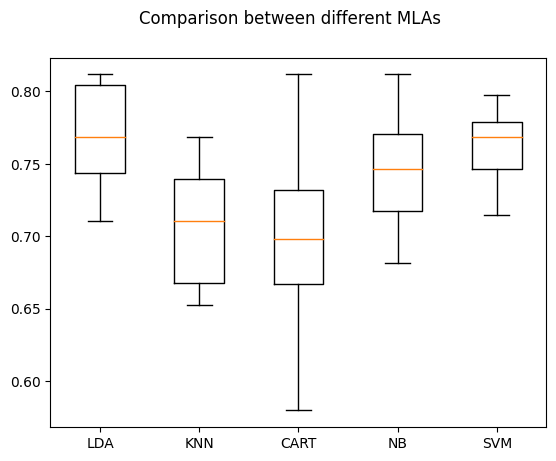

In [16]:
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Application of all Machine Learning methods

In [17]:
MLA = [

# GLM
linear_model.LogisticRegressionCV(),
linear_model.PassiveAggressiveClassifier(),
linear_model. RidgeClassifierCV(),
linear_model.SGDClassifier(),
linear_model.Perceptron(),

# Ensemble Methods
ensemble.AdaBoostClassifier(),
ensemble.BaggingClassifier(),
ensemble.ExtraTreesClassifier(),
ensemble.GradientBoostingClassifier(),
ensemble.RandomForestClassifier(),

# Gaussian Proesses
gaussian_process.GaussianProcessClassifier(),

# SVM
svm.SVC(probability=True),
svm.NuSVC(probability=True),
svm.LinearSVC(),


# Tree
tree.DecisionTreeClassifier(),


# Navies Bayes
naive_bayes.BernoulliNB(),
naive_bayes.GaussianNB(),

# Near Neighbor
neighbors.KNeighborsClassifier(),


]

In [18]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:

    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
MLA_compare

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,LogisticRegressionCV,0.7757,0.7922,0.666667,0.666667,0.757862
1,PassiveAggressiveClassifier,0.6570,0.6753,0.428571,0.125000,0.524764
2,RidgeClassifierCV,0.7728,0.7792,0.666667,0.583333,0.725629
3,SGDClassifier,0.6556,0.6623,0.250000,0.041667,0.492531
4,Perceptron,0.6527,0.6623,0.250000,0.041667,0.492531
5,AdaBoostClassifier,0.8148,0.8182,0.727273,0.666667,0.776730
6,BaggingClassifier,0.9855,0.7143,0.538462,0.583333,0.678459
7,ExtraTreesClassifier,1.0000,0.7532,0.608696,0.583333,0.706761
8,GradientBoostingClassifier,0.9074,0.7662,0.625000,0.625000,0.727594
9,RandomForestClassifier,1.0000,0.7662,0.625000,0.625000,0.727594


 ## Creating plot to show the train accuracy

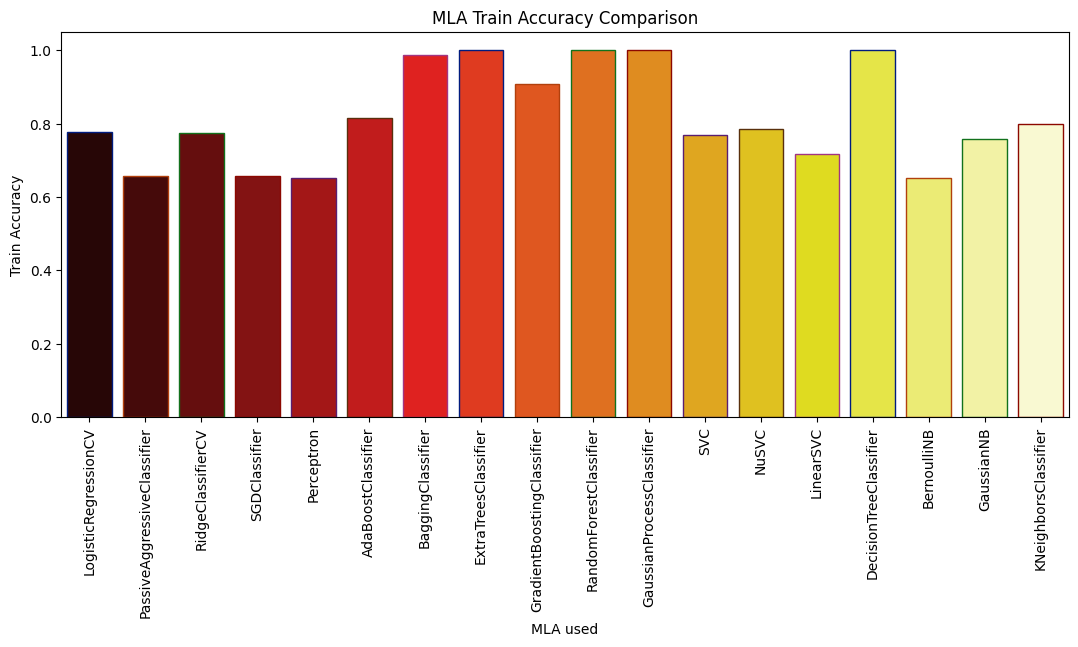

In [19]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

## Creating plot to show the test accuracy

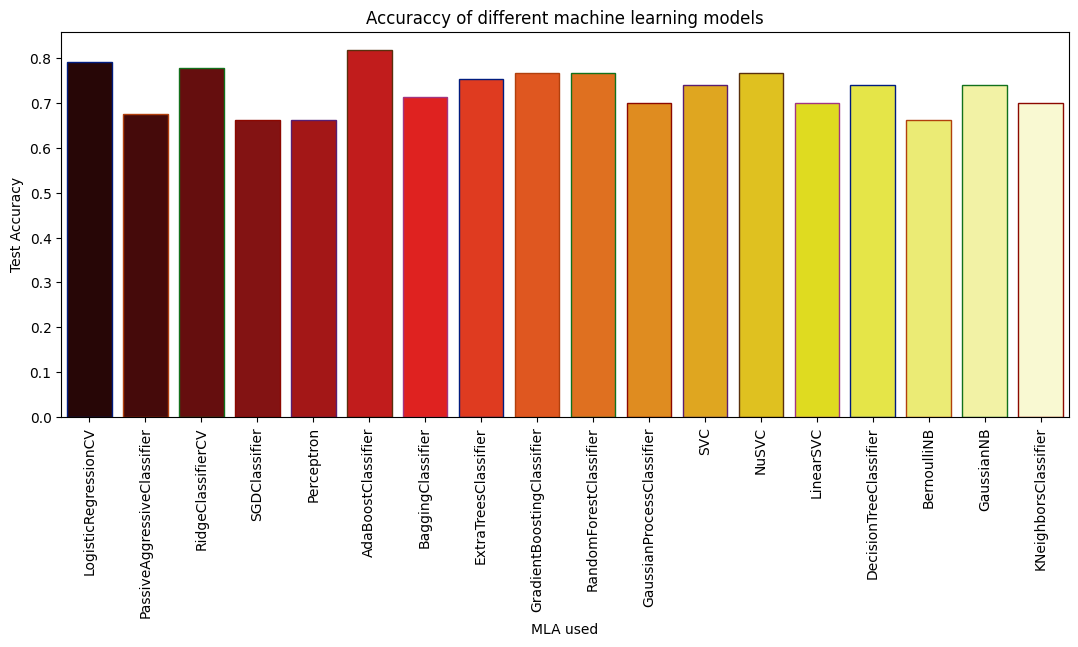

In [20]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()

## Creating plots to compare precission of the MLAs

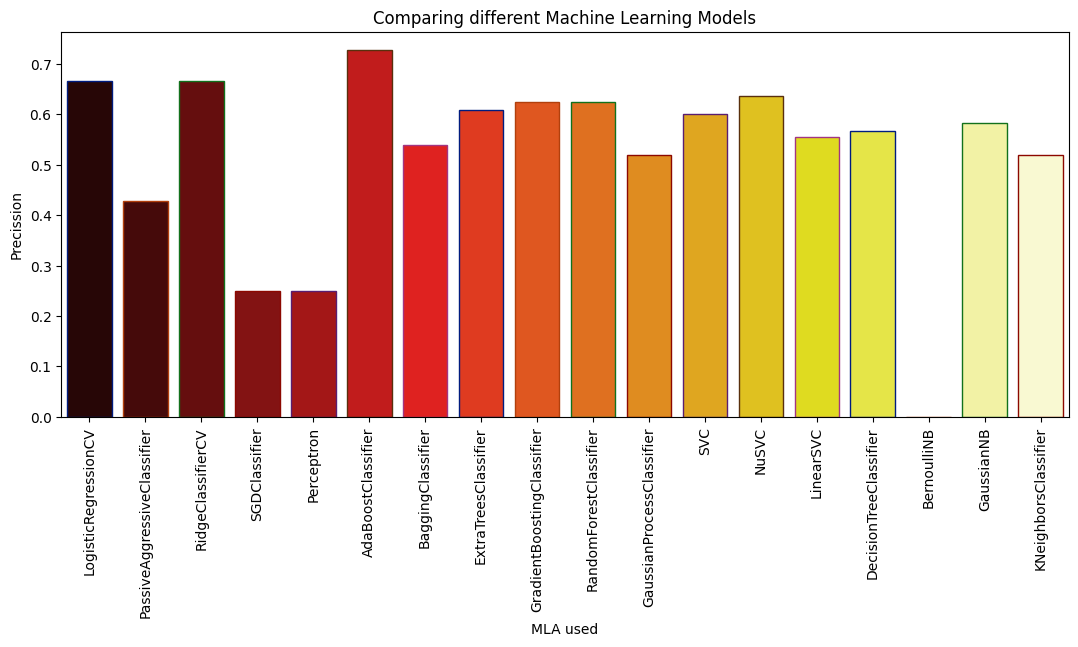

In [21]:
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()

## Creating plots for MLA recall comparison

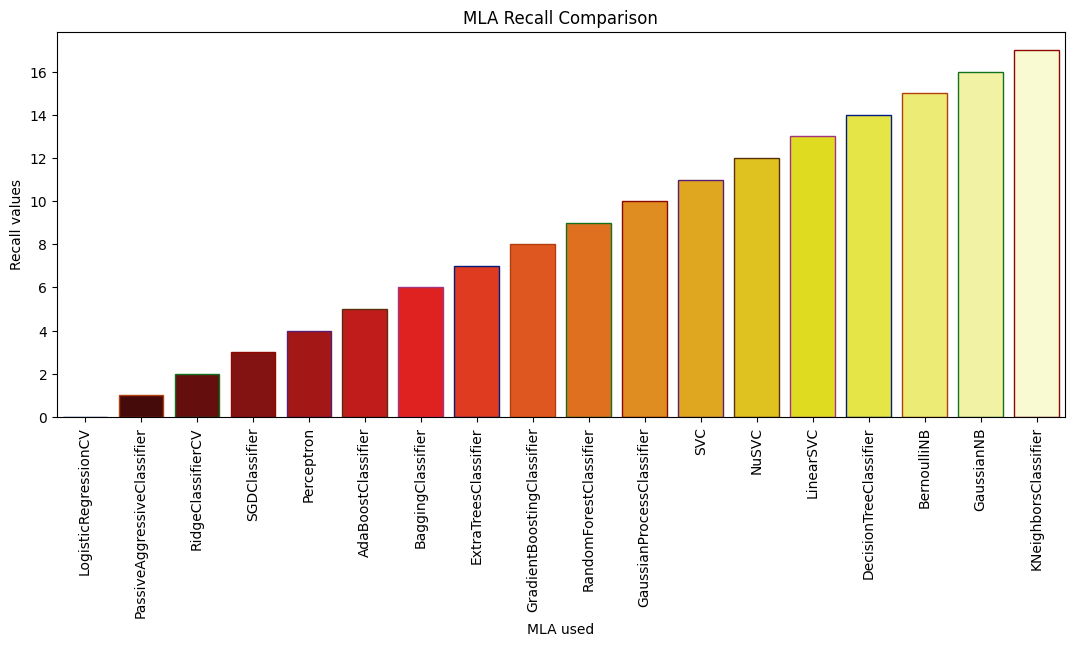

In [22]:
MLA_compare['Recall values'] = MLA_compare.index
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Recall values", data=MLA_compare, palette='hot', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

## Creating plot for MLA AUC comparison

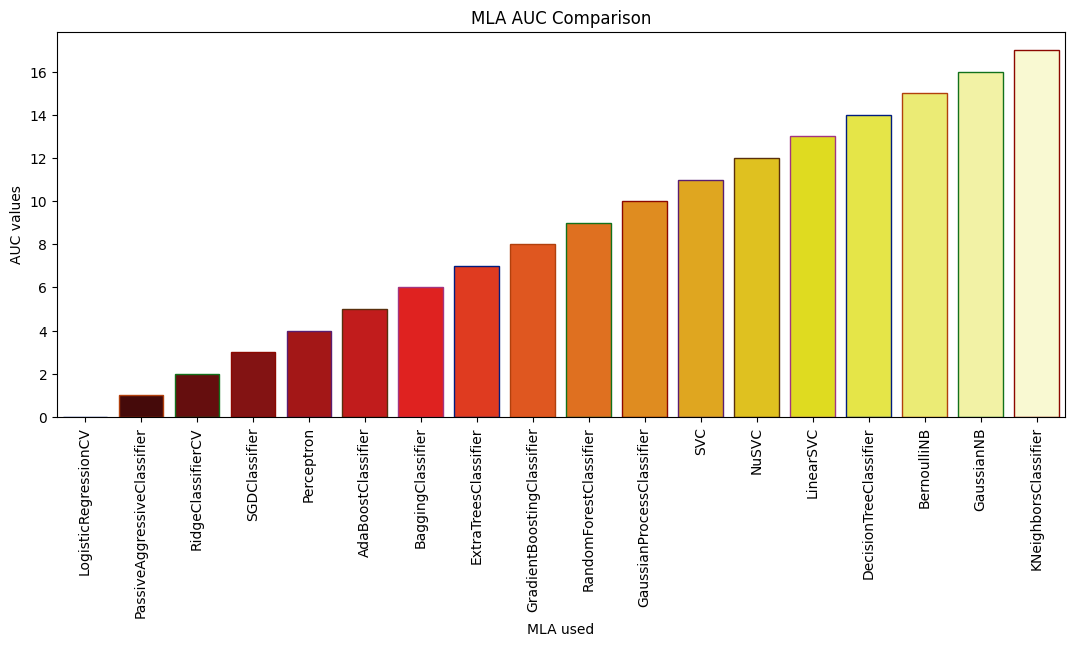

In [23]:
MLA_compare["AUC values"] = MLA_compare.index
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="AUC values",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

## Creating plot to show the ROC for all MLA

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

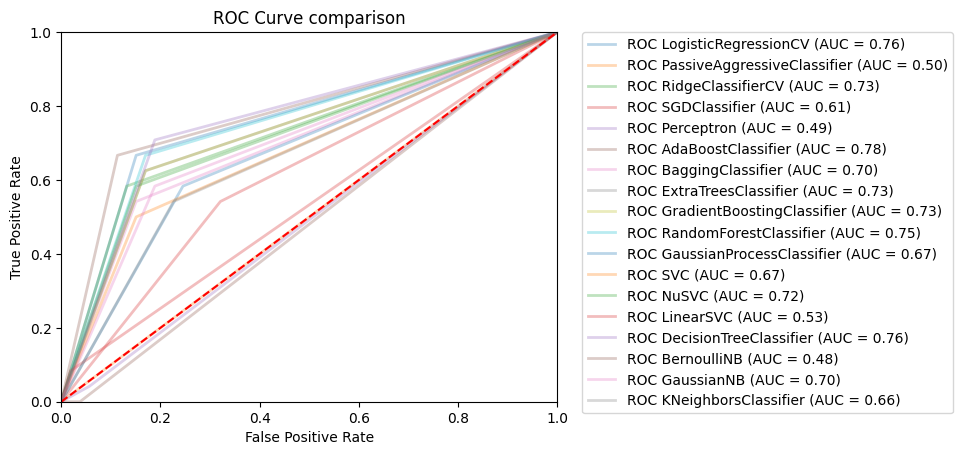

In [24]:
index = 1
for alg in MLA:


    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

    index+=1


plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()